# Graafikute kujundamine Pythonis paketiga Matplotlib

<div style="float: left;">Valter Kiisk<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 13.11.2023</div>

[Matplotlib](http://matplotlib.org/contents.html) on põhjalik objekt-orienteeritud teek mitmesuguste graafikute kujundamiseks Pythonis. Lihtsamad vahendid asuvad moodulis `matplotlib.pyplot`, millele importimisel antakse tüüpiliselt nimeks `plt`. Joonist tervikuna kirjeldab klass `matplotlib.figure.Figure` ja see luuakse käsuga `plt.figure`. Viimasel on ka hulk nimelisi argumente, millest olulisimad on joonise mõõdud tollides (`figsize`) ja punktide (pikslite) arv tolli kohta (`dpi`). Joonisele paigutatakse üks või mitu teljestikku (`Axes`). Vajadusel saab nende asukohta täpselt kontrollida (`Figure.add_axes`), aga enamasti lastakse need automaatselt paigutada tabelisse, milles on teatud arv ridu ja veerge. Näiteks käsuga `Figure.add_subplot(2, 3, 1)` antakse mõista, et joonisele kavatsetakse paigutada kokku kuni 6 teljestikku kahes reas ja kolmes veerus ning luuakse ja tagastatakse 1. teljestik (vaikimisi Cartesiuse ristteljestik). Kui kõik arvud on 10-st väiksemad, tohib selle käsu anda ka kujul `Figure.add_subplot(231)`. Seega ainult ühe teljestiku puhul oleks vastav käsk `add_subplot(111)`. Seejärel andmete kandmine teljestikule toimub käsuga `Axes.plot`, millele tuleb anda argumentidena andmemassiivid. Käsu `plot` korduva väljakutsega saab ühele graafikule lisada rohkem kui ühe andmeseeria. Lisaparameetritena saab näidata iga andmeseeria jaoks ka nime ja kujunduse. Seeriate eristamiseks üksteisest on põhimõtteliselt hulk võimalusi: ühelt poolt joone värv (`color`), stiil (`linestyle` ehk `ls`) ja paksus (`linewidth` ehk `lw`), teiselt poolt sümboli värv (`markeredgecolor` ja `markerfacecolor` ehk `mec` ja `mfc`), kuju (`marker`) ja suurus (`markersize` ja `markeredgewidth` ehk `ms` ja `mew`). Lihtsamate juhtude jaoks on olemas spetsiaalsed lühikesed koodid. Näiteks koodiga `r-` tehakse punast värvi (*red*) pidevjoon, koodiga `bo--` tehakse sinised (*blue*) mummud, mis on kriipsjoonega ühendatud, jne (vt [põhjalikumat kirjeldust](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html)). Andmeseeria tähis ja nimi kantakse legendile, mis tekib käsuga `Axes.legend`. Käsk `Axes.grid` lisab ruudustikujooned (*grid lines*). Viimaks graafik kuvatakse käsuga `plt.show()`. Seega piisavalt üldine objekt-orienteeritud kood ristteljestikuga graafiku kujundamiseks on umbes järgmine:

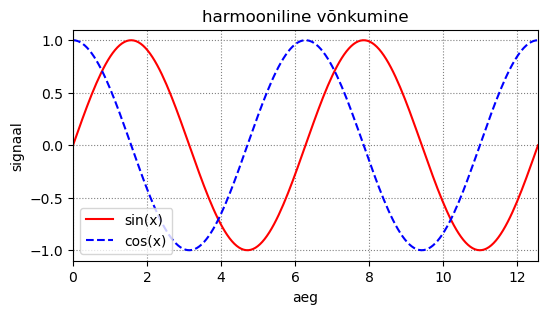

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4 * np.pi, 200)
fig = plt.figure(figsize=(6,3), dpi=100)
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), 'r-', label='sin(x)')
ax.plot(x, np.cos(x), 'b--', label='cos(x)')
ax.set_xlim(0, 4 * np.pi)
ax.set_title('harmooniline võnkumine')
ax.set_xlabel('aeg')
ax.set_ylabel('signaal')
ax.legend(loc='lower left')
ax.grid(color='gray', linestyle=':')
plt.show()

Vaikimisi graafik tekib otse Jupyteri töölehel (vajadusel saab seda nõuda direktiiviga `%matplotlib inline`). Direktiiviga `%matplotlib notebook` tekib interaktiivne graafik, kus saab graafikut hiirega liigutada, suurendada, salvestada jms. Alternatiivselt võib graafikuga toimetada eraldi aknas (näiteks `%matplotlib tk`, kui GUI raamistikuks valida [Tk](https://en.wikipedia.org/wiki/Tk_%28software%29)). Mainitud direktiivid (mis algavad protsendimärgiga) ei ole seotud Pythoniga, vaid on IPython'i "[maagilised käsud](http://ipython.readthedocs.io/en/stable/interactive/magics.html)". Märgime, et Jupyteri töölehel (st veebilehel) kuvatava graafiku suurust ei määra otseselt mitte joonise nõutud suurus tollides, vaid pikslite koguarv (=pikkusmõõt&times;punktitihedus), monitori punktitihedus ja veebilehe suurendusaste.

Moodulisse `matplotlib.pyplot` on koondatud komplekt lihtsate nimedega funktsioone (`plot`, `legend`, `xlabel` jne), mis ei vaja ilmutatud kujul joonisele ega teljestikule viitavate muutujate (nagu `fig` ja `ax`) kasutamist. Näiteks käsuga `plt.plot` lisatakse andmeseeria aktiivse joonise aktiivsele teljestikule või kui viimased puuduvad, siis need luuakse automaatselt. Pärast graafiku kuvamist hakkavad järgmised käsud kujundama juba uut graafikut jne. Kui teha need funktsioonid otseselt kättesaadavaks, saame efektiivselt Matlab'ile sarnase lihtsa käsustiku:

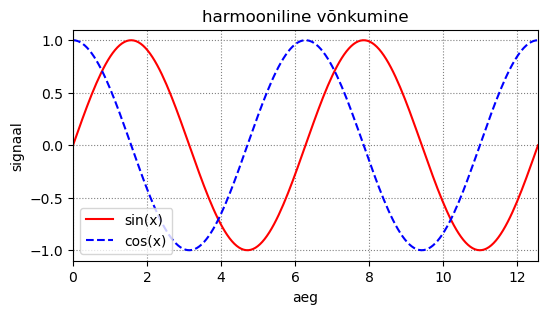

In [2]:
from matplotlib.pyplot import *

figure(figsize=(6,3), dpi=100)
subplot(111) # võib ära jätta, meil on ainult üks teljestik
plot(x, np.sin(x), 'r-', label='sin(x)')
plot(x, np.cos(x), 'b--', label='cos(x)')
xlim(0, 4 * np.pi)
title('harmooniline võnkumine')
xlabel('aeg')
ylabel('signaal')
legend(loc='lower left')
grid(color='gray', ls=':')
show()

Veel enne esimeste graafikute tegemist võiks paika panna mõned üldised vormindussätted, näiteks joonise vaikesuurus, lahutusvõime, šrifti suurus vms, nii et neid ei peaks iga joonise tegemisel eraldi määrama. Vaikeseadistustele pääseb ligi objekti `matplotlib.rcParams` vahendusel, aga mugavam on kasutada käsku `pyplot.style.use`, millele stiilisätted tuleb anda sõnastikuna (võti-väärtus paarid loogeliste sulgude vahel). Parameetrite täielik nimekiri on [siin](http://matplotlib.org/users/customizing.html).

In [3]:
import locale
locale.setlocale(locale.LC_NUMERIC, 'et-EE') # eestikeelsel graafikul pigem koma punkti asemel

style.use({
    #'figure.figsize': (6,4), # joonise suurus tollides
    'figure.dpi': 120, # lahutusvõime (mitu punkti tolli kohta)
    #'savefig.dpi': 300, # lahutusvõime joonise salvestamisel
    #'font.size': 12, # teksti suurus punktides
    'figure.titlesize': 'medium', # siin ja edaspidi suhteline suurus
    #'axes.titlesize': 'medium',
    'legend.fontsize': 'small',
    #'figure.facecolor': 'white', # joonise tausta värv
    #'lines.linewidth': 2, # graafiku joone jämedus
    #'lines.markeredgewidth': 0,
    #'lines.markersize': 5, # sümboli suurus
    #'axes.prop_cycle': cycler('color', 'rbgm'), # andmeseeriate värvused
    #'patch.facecolor': 'black', # noolte jms värvus
    #'patch.edgecolor': 'black',
    #'patch.linewidth': 0.8, # noolte jms joone jämedus
    #'mathtext.fontset': 'cm', # matemaatikašrift
    'axes.formatter.use_locale': True,
    'axes.formatter.use_mathtext': True
})

Mitut graafikut sisaldava joonise konstrueerimiseks tuleb käsku `Figure.add_subplot()` või lihtsalt `plt.subplot()` välja kutsuda mitu korda. Vaikimisi tekib ristkoordinaadistik, polaarkoordinaadistik luuakse parameetriga `projection='polar'` või `polar=True`.

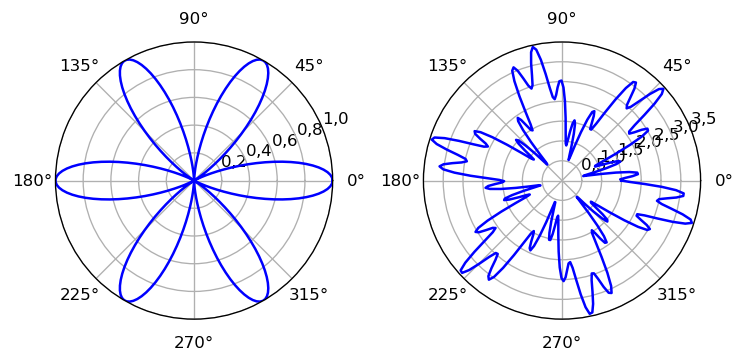

In [4]:
θ = np.linspace(0, 2 * np.pi, 300)
r1 = np.cos(3 * θ)**2
r2 = 2 - np.sin(6 * θ) - 0.5 * np.cos(30 * θ)

figure(figsize=(7,3))
subplot(121, polar=True)
plot(θ, r1, 'b-')
ylim(0, 1)
subplot(122, polar=True)
plot(θ, r2, 'b-')
ylim(0, 3.5)
subplots_adjust(wspace=0.3)
show()

Käsk `pyplot.subplots` teeb korraga valmis nii joonise kui ka hulga teljestikke (jällegi $m\times n$ maatriksis) ja tagastab viidad nimetatud objektidele. Seega ilmutatult objekt-orienteeritud kood eelneva joonise tegemiseks on selline:

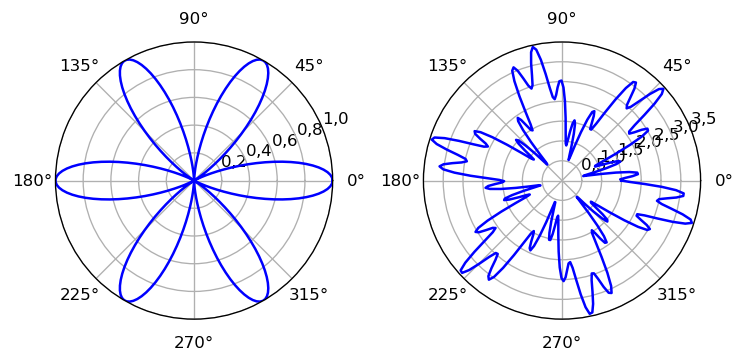

In [5]:
fig, (ax1, ax2) = subplots(1, 2, figsize=(7,3), subplot_kw=dict(polar=True))
ax1.plot(θ, r1, 'b-')
ax1.set_ylim(0, 1)
ax2.plot(θ, r2, 'b-')
ax2.set_ylim(0, 3.5)
subplots_adjust(wspace=0.3)
show()

Lihtsamatel juhtudel võib kasutada käsku `plt.polar`, mis teeb valmis polaarkoordinaadistiku ja lisab sellele kohe ka andmeseeria (nagu `plot`).

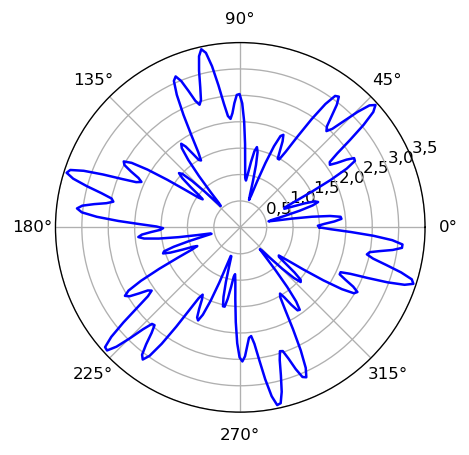

In [6]:
figure(figsize=(4,4))
polar(θ, r2, 'b-')
ylim(0, 3.5)
show()

Olgu meil eksperimentaalselt mõõdetud sõltuvus, mida teoreetiliselt peaks kirjeldama astme-, eksponent- või logaritmfunktsioon. Selle veenvaks demonstreerimiseks tuleks graafik (st selle üks või mõlemad teljed) viia logaritmilisse skaalasse, nii et see sõltuvus muutuks lineaarseks:

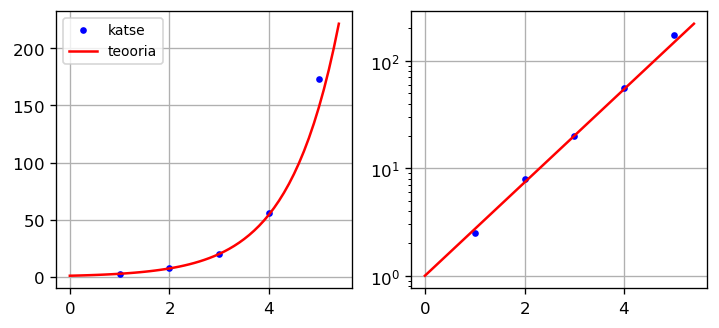

In [7]:
# "eksperimentaalsed" andmepunktid
x1 = [1, 2, 3, 4, 5]
y1 = [2.5, 8, 20, 56, 173]

# teoreetiline sõltvus (pidevjoon) peenema sammuga
x2 = np.arange(0, 5.5, 0.1)
y2 = np.exp(x2)

figure(figsize=(7,3))
subplot(121)
plot(x1, y1, "b.", label="katse")
plot(x2, y2, "r-", label="teooria")
grid()
legend()
subplot(122)
plot(x1, y1, "b.")
plot(x2, y2, "r-")
yscale('log')
grid()
show()

Automaatne skaalakriipsude (*ticks*) valik ei pruugi olla alati optimaalne. Näiteks äsja saadud graafikutel võiks skaalakriipsud olla kohati tihedama sammuga. Kõige konkreetsem lahendus on kõikide kriipsude (ja vajadusel ka nende tähiste) asukohad jada või massiivina ette anda käskudega `plt.xticks` ja `plt.yticks`. Samas moodulist `matplotlib.ticker` leiab ka poolautomaatseid algoritme. Järgmine näide demonstreerib mõlemat võimalust.

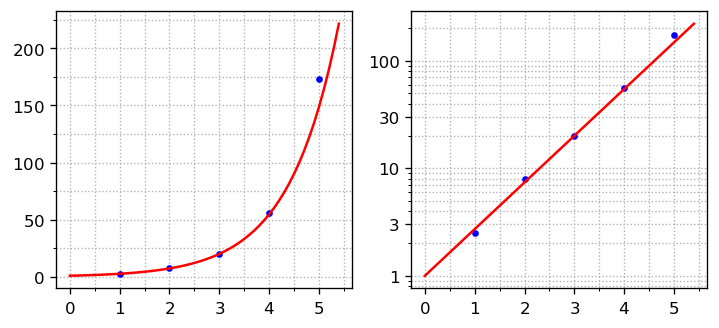

In [8]:
figure(figsize=(7,3))
subplot(121)
plot(x1, y1, 'b.')
plot(x2, y2, 'r-')
gca().xaxis.set_major_locator( MultipleLocator(1) )
gca().xaxis.set_minor_locator( MultipleLocator(0.5) )
gca().yaxis.set_major_locator( MultipleLocator(50) )
gca().yaxis.set_minor_locator( MultipleLocator(25) )
grid(which='both', ls=':')

subplot(122)
plot(x1, y1, 'b.')
plot(x2, y2, 'r-')
yscale('log')
xticks( np.arange(0, 6, 1) )
xticks( np.arange(0.5, 6.5, 1), minor=True )
asukohad = 1, 3, 10, 30, 100
yticks( asukohad, asukohad )  # kriipsud ja nende tähised
grid(which='both', ls=':')
show()

Kui on tarvis sõltumatu muutuja (harilikult x-teljel) näidata logaritmilises skaalas, osutub käepäraseks funktsioon `numpy.geomspace(a,b,n)`, mis tekitab $n$-elemendilise arvuvektori alates $a$ kuni $b$, kus arvud paiknevad ühtlase sammuga logaritmilisel skaalal.

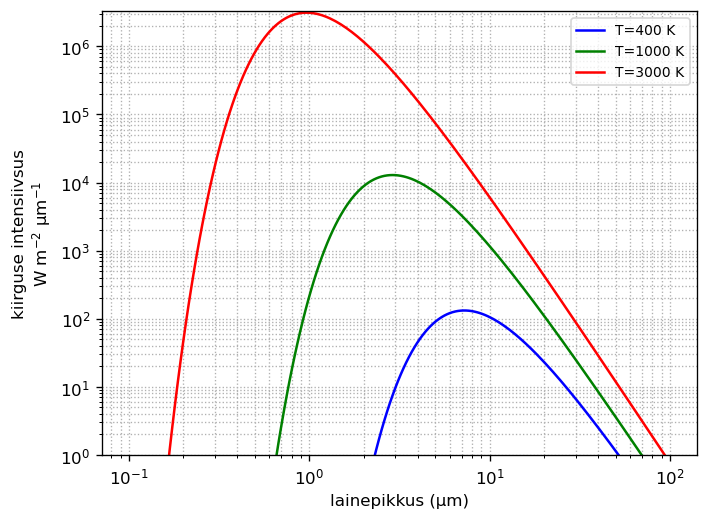

In [9]:
from scipy.constants import micro, c, h, k

# x on lainepikkus või lainepikkuste vektor [µm], T on temperatuur [K]
def planck(x, T):
    x = x * micro
    a = np.exp(h * c / (x * k * T)) - 1
    return 2 * np.pi * h * c**2 / x**5 / a * micro

x = np.geomspace(0.1, 100, 200) # 0.1 kuni 100 mikromeetrit, 200 punkti

gca().set_prop_cycle( cycler('color', 'bgr') )
for T in (400, 1000, 3000):
    plot(x, planck(x, T), '-', label='T=%.0f K' % T)

xlabel('lainepikkus (µm)')
ylabel('kiirguse intensiivsus\nW m$^{-2}$ µm$^{-1}$')
ylim(ymin=1)
xscale('log')
yscale('log')
legend()
grid(which='both', ls=':')
show()

Käsk `plt.gca()` (*get current axes*) tagastab viida aktiivsele teljestikule. (On olemas ka käsk `gcf()`, mis tagastab viida joonisele.) 

Eespool on juba graafikute annoteerimiseks ja ilustamiseks kasutatud käske `title`, `xlabel`, `ylabel`, `legend` ja `grid`. Graafikul toodud sõltuvuste illustreerimiseks kasutatakse sageli vertikaalseid või horisontaalseid abijooni, mida saab luua käskudega `axhline` ja `axvline`. Käskudega `text` ja `annotate` saab meelevaldsesse kohta graafikul lisada mitmesuguseid spetsiaalseid annotatsioone. Seejuures igasugune tekstielement suudab renderdada ka matemaatilisi sümboleid ja valemeid — vastavas sõne-tüüpi argumendis tuleb LaTeX-koodis avaldis kirjutada kahe dollarimärgi vahele. Matplotlib ise tunneb teatud [alamhulka](https://matplotlib.org/users/mathtext.html#mathtext-tutorial) LaTeX'i käsustikust, aga süsteemi saab seadistada ka nii, et kasutatakse välist, täismahulist LaTeX'i installatsiooni (`rcParams['text.usetex']`).

Kui graafiku vormistamisega juba niipalju vaeva nähakse, on harilikult eesmärk graafik salvestada (et kasutada seda artiklis, esitluses, vms). Kui graafik on interaktiivne, on seal olemas ka salvestamise nupp. Teine variant on kasutada käsku `savefig`. Failitüüp valitakse automaatselt failinime laiendi järgi. Olemas on nii vektorgraafika (näiteks PDF) kui ka rastergraafika (PNG) formaadid. Parameetriga `bbox_inches='tight'` saab kõrvaldada tühja valge ala graafiku ümbert.

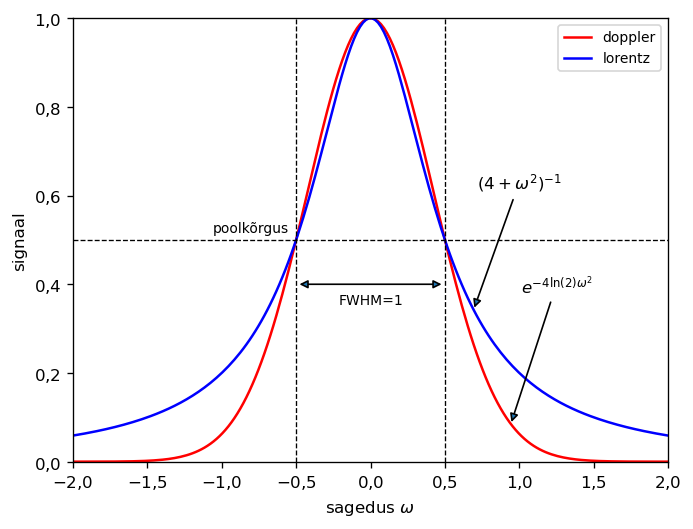

In [10]:
doppler = lambda x: np.exp(-4 * np.log(2) * x**2 )
lorentz = lambda x: 1 / (4 * x**2 + 1.0)
x = np.linspace(-2, 2, 200)

plot(x, doppler(x), 'r-', label='doppler')
plot(x, lorentz(x), 'b-', label='lorentz')
xlim(-2, 2)
ylim(0, 1)
xlabel('sagedus $\omega$')
ylabel('signaal')
axhline( 0.5, color='black', linewidth=0.8, linestyle='--')
axvline(-0.5, color='black', linewidth=0.8, linestyle='--')
axvline( 0.5, color='black', linewidth=0.8, linestyle='--')

text(-0.55, 0.51, 'poolkõrgus', fontsize='small', va='bottom', ha='right')
annotate('', xy=(0.5, 0.4), xytext=(-0.5, 0.4), arrowprops=dict(arrowstyle='<|-|>'))
text(0, 0.38, 'FWHM=1', fontsize='small', va='top', ha='center')
annotate('$(4+\omega^2)^{-1}$', xy=(0.69, 0.34), xytext=(1, 0.63),
             va='center', ha='center', arrowprops=dict(arrowstyle='-|>'))
annotate('$e^{-4\ln(2)\omega^2}$', xy=(0.94, 0.082), xytext=(1.25, 0.4),
             va='center', ha='center', arrowprops=dict(arrowstyle='-|>'))
legend()
savefig('test.pdf', bbox_inches='tight')
show()

Selles näites `text` ja `annotate` kasutasid graafiku enda koordinaate, mis oli antud juhul igati mõistlik. Mõnikord on vaja tekst paigutada graafikule kindlasse kohta telgede suhtes, näiteks andes koordinaadid murdosana vastava telje pikkusest. Seda saab teha käsuga `annotate`, lisades nimelise parameetri `xycoords='axes fraction'`. Alati kui mõnda tüüplahendust piisavalt sageli tarvis läheb, tasub see paindlikult kasutataval kujul kapseldada uude funktsiooni (või klassi).

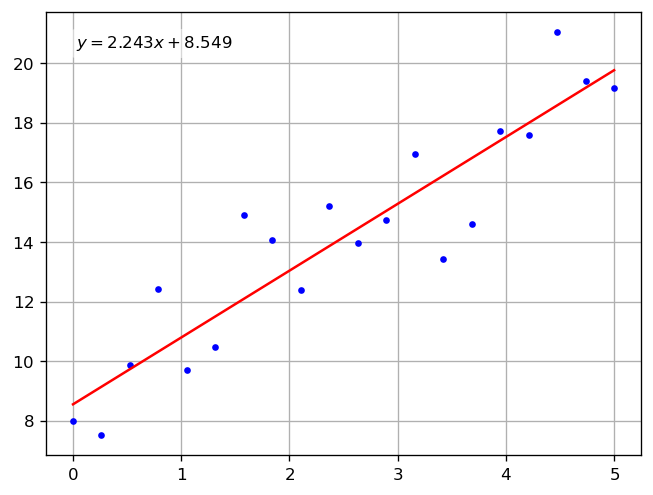

In [18]:
def axis_text(x, y, s, bs='round', fc=None, ec='none', alpha=None, **kwargs):
    annotate(s, (x, y), xycoords='axes fraction',
             bbox=dict(boxstyle=bs, fc=fc, ec=ec, alpha=alpha), **kwargs)

n = 20
x = np.linspace(0, 5, n)

np.random.seed(42)
y = 3 * x + 7 + 2 * np.random.randn(n)
a, b = np.polyfit(x, y, 1)
plot(x, y, 'b.')
plot(x, a * x + b, 'r-')
axis_text(0.05, 0.95, f'$y={a:.3f}x+{b:.3f}$', fc='white', alpha=0.5, va='top')
grid()
show()

Teaduslikes publikatsioonides on tavapärane, et sekundaarse tähtsusega graafik asetatakse primaarse teljestiku sisse. Täpse paigutusega teljestikke saab käsuga `plt.axes` (või `Figure.add_axes`), millele jadana `(left, bottom, width, height)` antakse teljestiku paigutus. Need on jällegi murdarvud, nii et joonise vastav mõõt (laius või kõrgus) on täpselt 1.

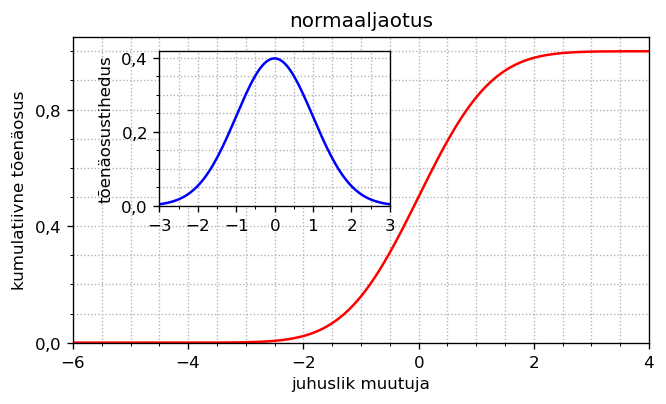

In [26]:
from scipy.special import erf

x = np.linspace(-6, 6, 200)
D = np.exp(-x**2/2) / np.sqrt(2 * np.pi)
F = (1 + erf(x / np.sqrt(2))) / 2

figure(figsize=(6,3))
axes( (0.15, 0.10, 0.80, 0.85) )  # left, bottom, width, height
plot(x, F, 'r-')
xlim(-6, 4)
ylim(ymin=0)
gca().xaxis.set_major_locator( MultipleLocator(2) )
gca().xaxis.set_minor_locator( MultipleLocator(0.5) )
gca().yaxis.set_major_locator( MultipleLocator(0.4) )
gca().yaxis.set_minor_locator( MultipleLocator(0.1) )
xlabel('juhuslik muutuja')
ylabel('kumulatiivne tõenäosus')
grid(which='both', ls=':')
title('normaaljaotus')
axes( (0.27, 0.48, 0.32, 0.43) )  # left, bottom, width, height
plot(x, D, 'b-')
xlim(-3, 3)
ylim(ymin=0)
gca().xaxis.set_major_locator( MultipleLocator(1) )
gca().xaxis.set_minor_locator( MultipleLocator(0.5) )
gca().yaxis.set_major_locator( MultipleLocator(0.2) )
gca().yaxis.set_minor_locator( MultipleLocator(0.05) )
ylabel('tõenäosustihedus')
grid(which='both', ls=':')
show()

Sellist tüüpi (sisuliselt sama x-telge kasutavate) andmete korral on veelgi mõistlikum sekundaarse y-telje kasutamine, mille saab käsuga `Axes.twinx()`. Viidet primaarsele teljestikule (mis tekib käsuga `plt.axes()`) võib, aga ei pea säilitama, sest sellele saab hiljem ligi ka käsuga `plt.gca()`. Sellise graafiku puhul tuleb aga nooltega ära märkida, kummale y-teljele üks või teine andmeseeria vastab. Ruudustikujoonte lisamisel tuleb ka veidi vaeva näha kummagi y-telje skaalakriipsude joondamisel.

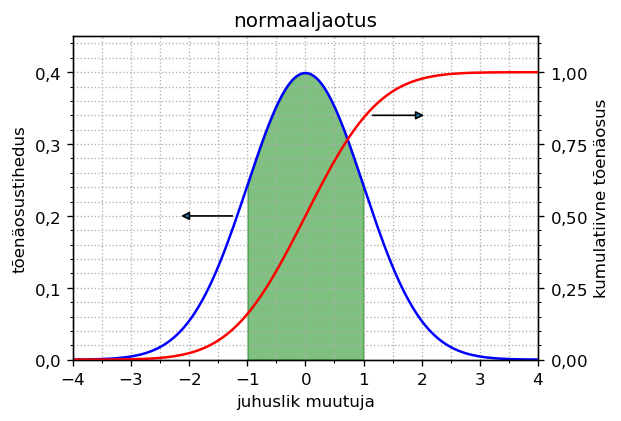

In [36]:
def harrow(x, y, p): # horis. nool pikkusega p alates punktist (x,y)
    annotate('', xy=(x + p, y), xytext=(x, y), arrowprops=dict(arrowstyle='-|>') )

figure(figsize=(5, 3.5))
plot(x, D, 'b-')
fill_between(x, D, 0, where=abs(x)<=1, color='green', alpha=0.5)
xlim(-4, 4)
ylim(0, 0.45)
gca().xaxis.set_major_locator( MultipleLocator(1) )
gca().xaxis.set_minor_locator( MultipleLocator(0.5) )
gca().yaxis.set_major_locator( MultipleLocator(0.1) )
gca().yaxis.set_minor_locator( MultipleLocator(0.02) )
xlabel('juhuslik muutuja')
ylabel('tõenäosustihedus')
harrow(-1.2, 0.2, -1)
grid(which='both', ls=':')
twinx()
plot(x, F, 'r-')
ylim(0, 1.125)
gca().yaxis.set_major_locator( MultipleLocator(0.25) )
gca().yaxis.set_minor_locator( MultipleLocator(0.05) )
ylabel('kumulatiivne tõenäosus')
title('normaaljaotus')
harrow(1.1, 0.85, 1)
show()

Ja veel üks variant:

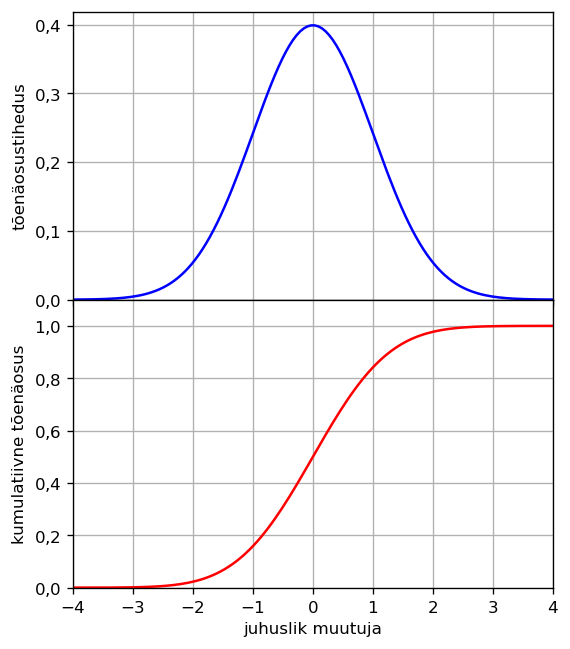

In [39]:
figure(figsize=(5,6))
ax = axes( (0.15, 0.5, 0.80, 0.40) )  # left, bottom, width, height
setp(ax.get_xticklabels(), visible=False)
plot(x, D, 'b-')
ylim(ymin=0)
ylabel('tõenäosustihedus')
grid()
axes( (0.15, 0.1, 0.80, 0.40), sharex=ax)
plot(x, F, 'r-')
xlabel('juhuslik muutuja')
ylabel('kumulatiivne tõenäosus')
xlim(-4, 4)
ylim(0, 1.1)
grid()
show()

Kui on olemas mingi varieeruva või juhusliku suuruse väärtuste massiiv, siis ülevaate saamiseks selle suuruse varieeruvusest ja jaotusfunktsioonist joonestatakse [histogramm](https://en.wikipedia.org/wiki/Histogram). Selle tekitab funktsioon `plt.hist`, kus lisaks arvumassiivile saab näidata ka vahemiku (`range`) ja mitmeks intervalliks see jagada (`bins`). Funktsioon `hist` (mis tugineb NumPy funktsioonile `numpy.histogram`) tagastab ka histogrammi väärtused massiivina (mida me siin ei kasuta). Näidisandmemassiivi tekitamiseks on tarvis juhuslike arvude generaatoreid moodulist `numpy.random`. Näiteks `numpy.random.randn(n)` genereerib `n`-elemendilise vektori [standardnormaaljaotusega](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution) juhuslikest arvudest.

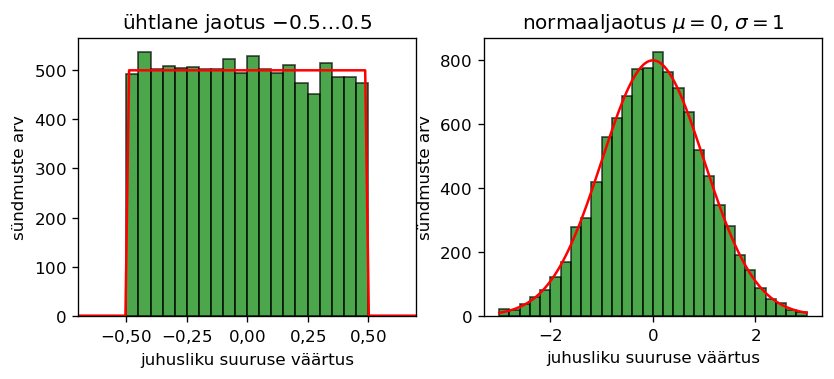

In [40]:
# juhuslike arvude järjendid
np.random.seed(42)
n = 10000 # elementide arv
a = np.random.uniform(-0.5, 0.5, n)
b = np.random.randn(n)

# teoreetilise kõvera jaoks 400 punkti
x = np.linspace(-3, 3, 400)

figure(figsize=(8,3))
subplot(121)
hist(a, bins=20, range=(-0.5,0.5), facecolor='g', edgecolor='k', alpha=0.7)
y = np.where(abs(x) <= 0.5, n * 0.05, 0.0)  # vahemik 1 ühikut jagatud 20 osaks = 0.05
plot(x, y, 'r-')
xlim(-0.7,0.7)
xlabel('juhusliku suuruse väärtus')
ylabel('sündmuste arv')
title('ühtlane jaotus $-0.5\ldots 0.5$')

subplot(122)
hist(b, 30, range=(-3,3), facecolor='g', edgecolor='k', alpha=0.7)
y = n * 0.2 * np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)  # vahemik 6 ühikut jagatud 30 osaks = 0.2
plot(x, y, 'r-')
xlabel('juhusliku suuruse väärtus')
ylabel('sündmuste arv')
title('normaaljaotus $\mu=0$, $\sigma=1$')
show()

Mõlema histogrammi peale oleme joonestanud ka vastava teoreetilise kõvera (sile punane joon). `x`-vektor on siin genereeritud funktsiooniga `numpy.linspace(a,b,n)`. See on sarnane funktsioonile `numpy.arange(a,b,s)`, kuid kolmanda parameetrina antakse sammu `s` asemel punktide koguarv `n` (st vahemik $a\ldots b$ jagatakse $n-1$ võrdseks osaks). Sel juhul on kindel, et saadud arvuvektorisse kuuluvad ka vahemiku algus ja lõpp. Teoreetilised jaotusfunktsioonid,  mis kirjeldavad [tõenäosustihedust](https://en.wikipedia.org/wiki/Probability_density_function) (st tõenäosust ühikulise vahemiku kohta), tuleb korrutada nii katsete koguarvuga `N` kui ka histogrammi ühe tulba laiusega.

Ühtlase jaotuse tihedusfunktsioon on vaid [tükati pidev](https://en.wikipedia.org/wiki/Piecewise). Funktsioon `numpy.where` on üks võimalus paljudest tükati pidevate vektoriseeritud funktsioonide realiseerimiseks (muud analoogsed vahendid on `numpy.piecewise`, `numpy.heaviside`, jms). Võrdlusoperaatorite (suurem, väiksem, jne) tähendus on NumPy massiivide jaoks samuti üle defineeritud ja annab tulemuseks tõeväärtustest (`True` või `False`) koosneva massiivi.

3D-graafiku tegemiseks on tarvis spetsiaalset teljestikku, mida esindab klass `Axes3D` moodulist `mpl_toolkits.mplot3d`. Kolmemõõtmelise pinna (*surface plot*) kirjeldamiseks on tarvis kolm maatriksit, mille elemendid kirjeldavad vastavalt x-, y- ja z-väärtuseid. x- ja y-maatriksid saab mugavalt NumPy funktsiooniga `meshgrid`. Vaatenurgad pannakse paika meetodiga `Axes3D.view_init`. [Värvipaletid](https://matplotlib.org/examples/color/colormaps_reference.html) on defineeritud moodulis `matplotlib.cm`. 

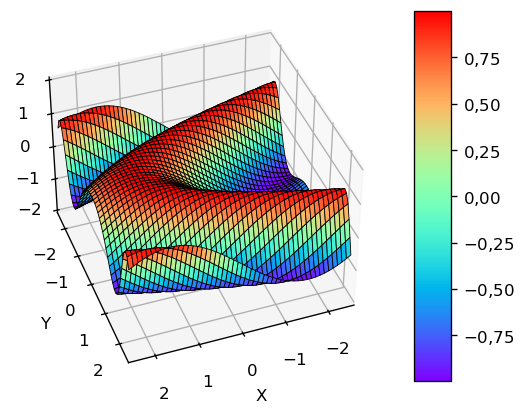

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

m, δ = 2.5, 0.1
n = int(round(2 * m/δ)) + 1
x = np.linspace(-m, m, n)
y = np.linspace(-m, m, n)
X, Y = np.meshgrid(x, y)
Z = np.sin(X + Y**2)

fig = figure(figsize=(7,4))
ax = fig.add_subplot(111, projection='3d')
pind = ax.plot_surface(X, Y, Z, cmap=cm.rainbow, rstride=1, cstride=1,
                       linewidth=0.5, edgecolors='black')

ax.set_xlim(-m, m)
ax.set_ylim(-m, m)
ax.set_zlim(-2, 2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(40, 70)
fig.colorbar(pind, aspect=10)
show()

Kui kasutada `%matplotlib inline` asemel `%matplotlib notebook`, saame interaktiivse graafiku, mille vaadet saab muuta hiirega lohistades:

<IPython.core.display.Javascript object>


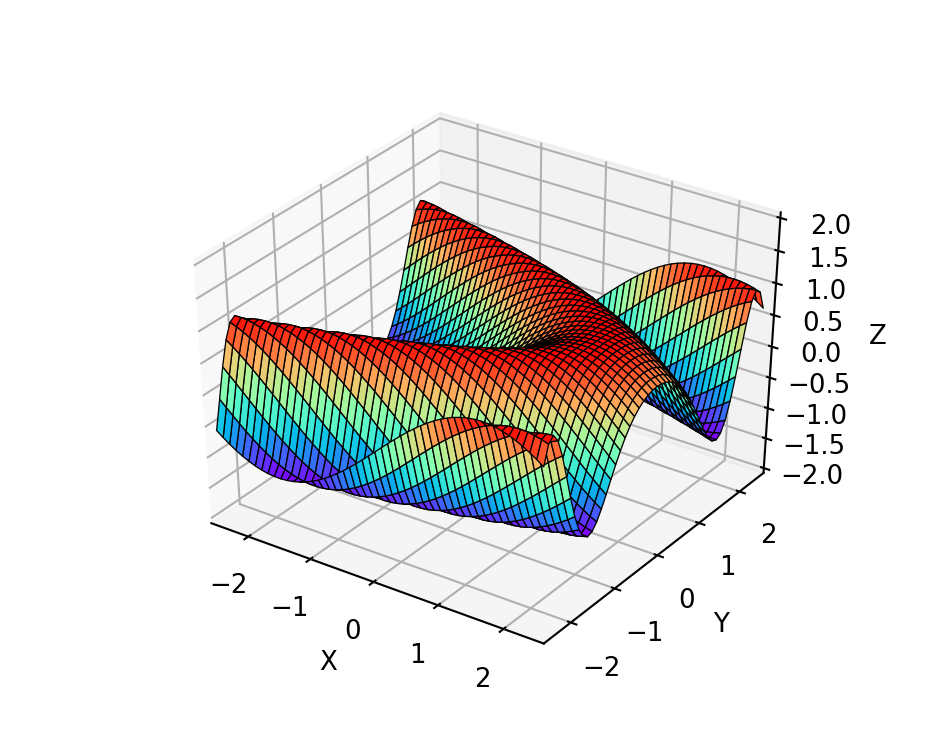

In [123]:
%matplotlib notebook

fig = figure(figsize=(5,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.rainbow, rstride=1, cstride=1, linewidth=0.5, edgecolors='black')
ax.set_xlim(-m, m)
ax.set_ylim(-m, m)
ax.set_zlim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
show()

Interaktiivset graafikut saab ka animeerida:

<IPython.core.display.Javascript object>


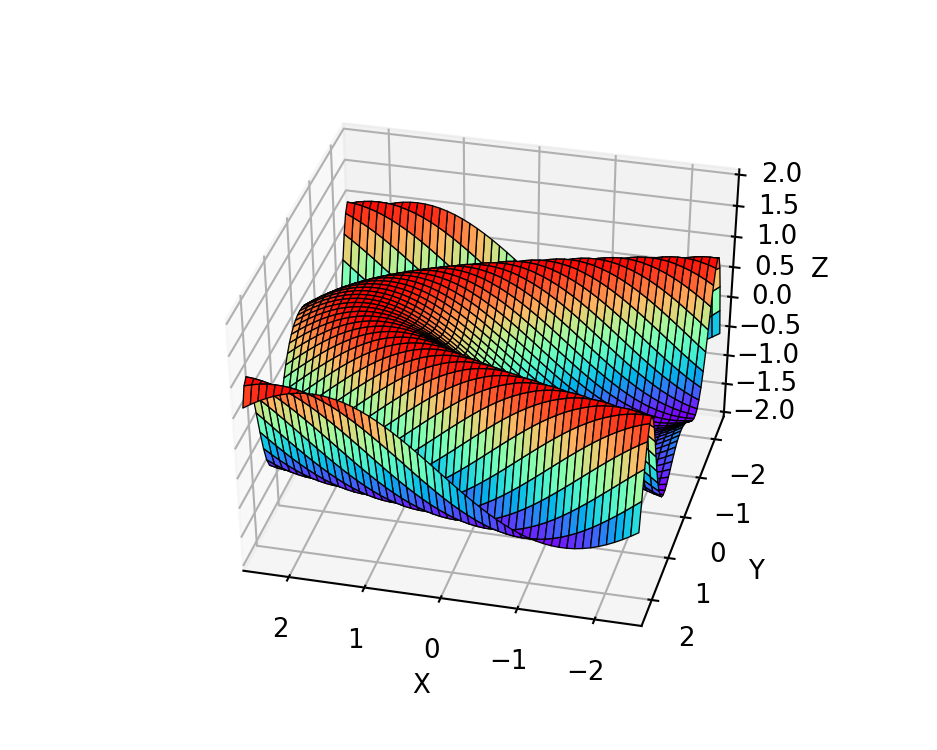

In [137]:
import matplotlib.animation

fig = figure(figsize=(5,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.rainbow, rstride=1, cstride=1, linewidth=0.5, edgecolors='black')
ax.set_xlim(-m, m)
ax.set_ylim(-m, m)
ax.set_zlim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

def animate(i):
    ax.view_init(40, 2 * i)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=180, interval=100)
show()

Käsuga `imshow` või `pcolormesh` saab mistahes 2D massiivi kujutada värvipildina (nagu 3D graafik pealtvaates, kus signaali tugevuse näitajaks jääb vaid värvusskaala). `imshow` lubab kasutada mitmesuguseid interpoleerimisalgoritme, et kaotada teravad üleminekud pildielementide vahel, ja pildielementide kuvasuhe on vaikimisi 1 (seda saab mõjutada parameetriga `aspect`). `pcolormesh` puhul saab kasutada [Gouraud interpolatsiooni](https://en.wikipedia.org/wiki/Gouraud_shading) (parameeter `shading`).

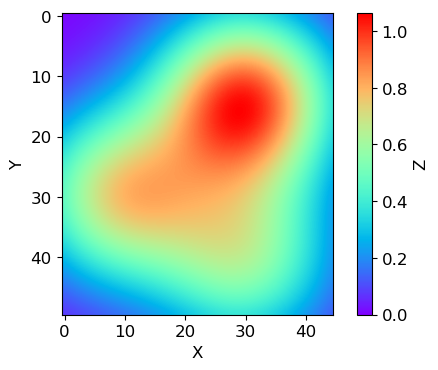

In [69]:
kelluke = lambda x, y: np.exp(-0.5 * (x**2 + y**2))

xmin, xmax = -3, 1.5    # neid parameetreid läheb ka hiljem tarvis
ymin, ymax = -1.5, 3.5  # pildi x-y skaala seadistamiseks
Δx, Δy = 0.1, 0.1
nx = int(round((xmax - xmin) / Δx))
ny = int(round((ymax - ymin) / Δy))
x = np.linspace(xmin + Δx, xmax - Δx, nx)
y = np.linspace(ymax - Δy, ymin + Δy, ny)
X, Y = np.meshgrid(x, y)
Z = kelluke(X, Y - 2.0) + 0.55 * kelluke(X, Y + 0.5) + 0.7 * kelluke(X + 2.0, Y - 0.5)

fig = figure(figsize=(6,4))
pind = imshow(Z, cmap=cm.rainbow, interpolation = 'bicubic', vmin=0)
xlabel('X')
ylabel('Y')
värviskaala = fig.colorbar(pind)
värviskaala.set_label('Z')
show()

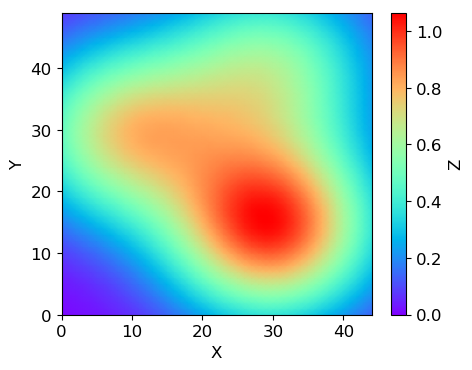

In [70]:
fig = figure(figsize=(5,4))
pind = pcolormesh(Z, cmap=cm.rainbow, shading='gouraud', vmin=0)
xlabel('X')
ylabel('Y')
värviskaala = fig.colorbar(pind)
värviskaala.set_label('Z')
show()

Vaikimisi näidatakse telgedel rea- ja veeruindekseid. Funktsioonile `pcolormesh` saaks anda ka pildielementide vahekohtade x- ja y-koordinaadid (pildielementid ei pruugi olla isegi sama suurusega). `imshow` korral saab skaala piirid näidata parameetriga `extent`:

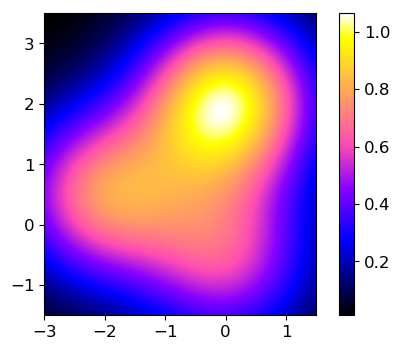

In [71]:
fig = figure(figsize=(6,4))
pind = imshow(Z, cmap=cm.gnuplot2, interpolation = 'bicubic',
              extent=(xmin, xmax, ymin, ymax) )  # left, right, bottom, top
fig.colorbar(pind)
show()

Rõhutame, et `extent` väljendab välimiste pikslite välimiste servade (mitte keskpunktide) koordinaate. Selles saab veenduda, kui võtta väga väike maatriks, kus pikslid on selgelt näha:

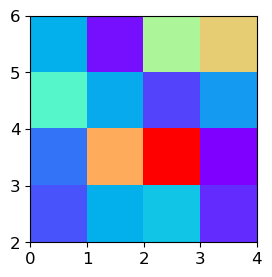

In [81]:
figure(figsize=(3,3))
imshow(rand(4,4), cmap=cm.rainbow, extent=(0, 4, 2, 6) )  # left, right, bottom, top
show()

`imshow`-tüüpi pildi asemel saab alternatiivselt enam-vähem sama detailse info edasi anda kontuurjoonte kaudu, kasutades funktsiooni `contour` või `contourf`. Vajadusel saab näidata parameetriga `levels`, millistel "kõrgustel" kontuurjooned joonestada, aga antud näite korral leiab programm ise mõistliku komplekti.

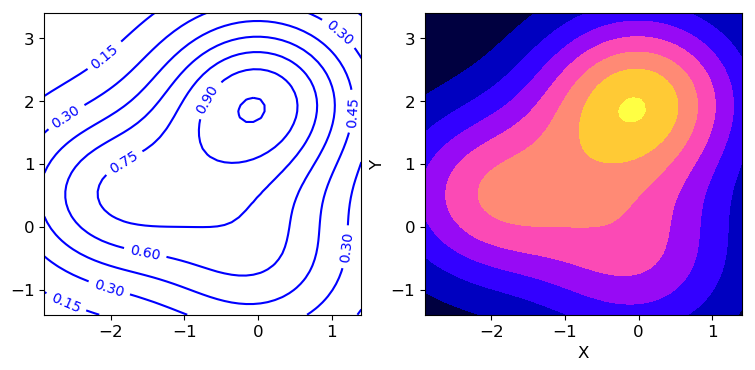

In [72]:
fig=figure(figsize=(9,4))
subplot(121)
kont = contour(X, Y, Z, colors='blue')
clabel(kont, inline=1, fontsize=10, fmt='%.2f')
subplot(122)
contourf(X, Y, Z, cmap=cm.gnuplot2)
xlabel('X')
ylabel('Y')
show()

Funktsioon `imshow` interpreteerib massiivi RGB-värvifotona juhul kui tegemist on $M\times N\times 3$ massiiviga, mille andmetüüp on kas `uint8` või `float64` (viimasel juhul signaaliväärtused peaksid jääma diapasooni 0&hellip;1). Sel juhul pseudovärvusskaalat pole tarvis.

mõõdud: (1080, 1920, 3)
andmetüüp: uint8


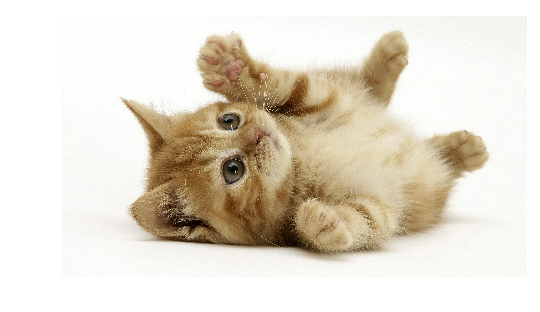

In [92]:
pilt = imread('cat.jpg')
print('mõõdud:', pilt.shape)
print('andmetüüp:', pilt.dtype)

imshow(pilt)
gca().axis('off')
show()